## Project 6 : Clustering
- Name:
- Date: 

## Instructions

### Description

Practice clustering on a using the well known and very popular `Iris` Dataset! The Iris flower data set is fun for learning supervised classification algorithms, and is known as a difficult case for unsupervised learning. 
https://cran.r-project.org/web/packages/dendextend/vignettes/Cluster_Analysis.html
<br><br>Yes, there are many examples out there, but see if you can do it yourself :). We can easily hypothesize on how many clusters would yield the best result, so let us prove it through a simple experiment that you could repeat with additional data sets.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Setup

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import sklearn as sk
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

### Problem 1: Data Generation (5 points)
Reference for more information: Chapter 5.11 K-Means in the online course book.

1. Load the `iris` dataset and separate into `X` and `y` variables (our ground truth labels will just be used for visualization).
2. Write a hypothesis on how many clusters will yield the best labeling.

In [16]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

###HYPOTHESIS: 3 clusters will yield the best labeling for the data since there are 3 species included

((150, 4), (150,))

**Hypothesis**(Edit this cell)
>
>

### Problem 2: Data exploration (10 points)

This is the step where you would normally conduct any needed preprocessing, data wrangling, and investigation of the data.
<br>**Note:** `print(iris.DESCR)` prints the iris dataset description, provided you loaded it into a variable named `iris`

a. Using your skills from previous projects, provide code below to produce answers to the following questions (edit this cell with your answers): 

    1. How many features are provided?

    **4 features**

    2. How many total observations?

    **150 total observations**

    3. How many different labels are included, what are they called, and is it a balanced dataset with the same number of observations for each class?

    **There are 3 labels (Iris-Setosa, Iris-Versicolour, and Iris-Virginica) and each class has an equal amount of instances**
        
b. Create a 2D or 3D scatter plot of two or three of the features and use the y labels for color coding. Do not reduce the data or number of features in any way (you will do this by applying PCA in problem 5).

c. Since clusters can be influenced by the magnitudes of the variables, scale the feature data and plot a histogram of the transformed feature data (think about if you should use the min-max, standard scaler, or normalizer).

In [17]:
# a
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0.5, 0.92, '3D scatter plot of Iris dataset')

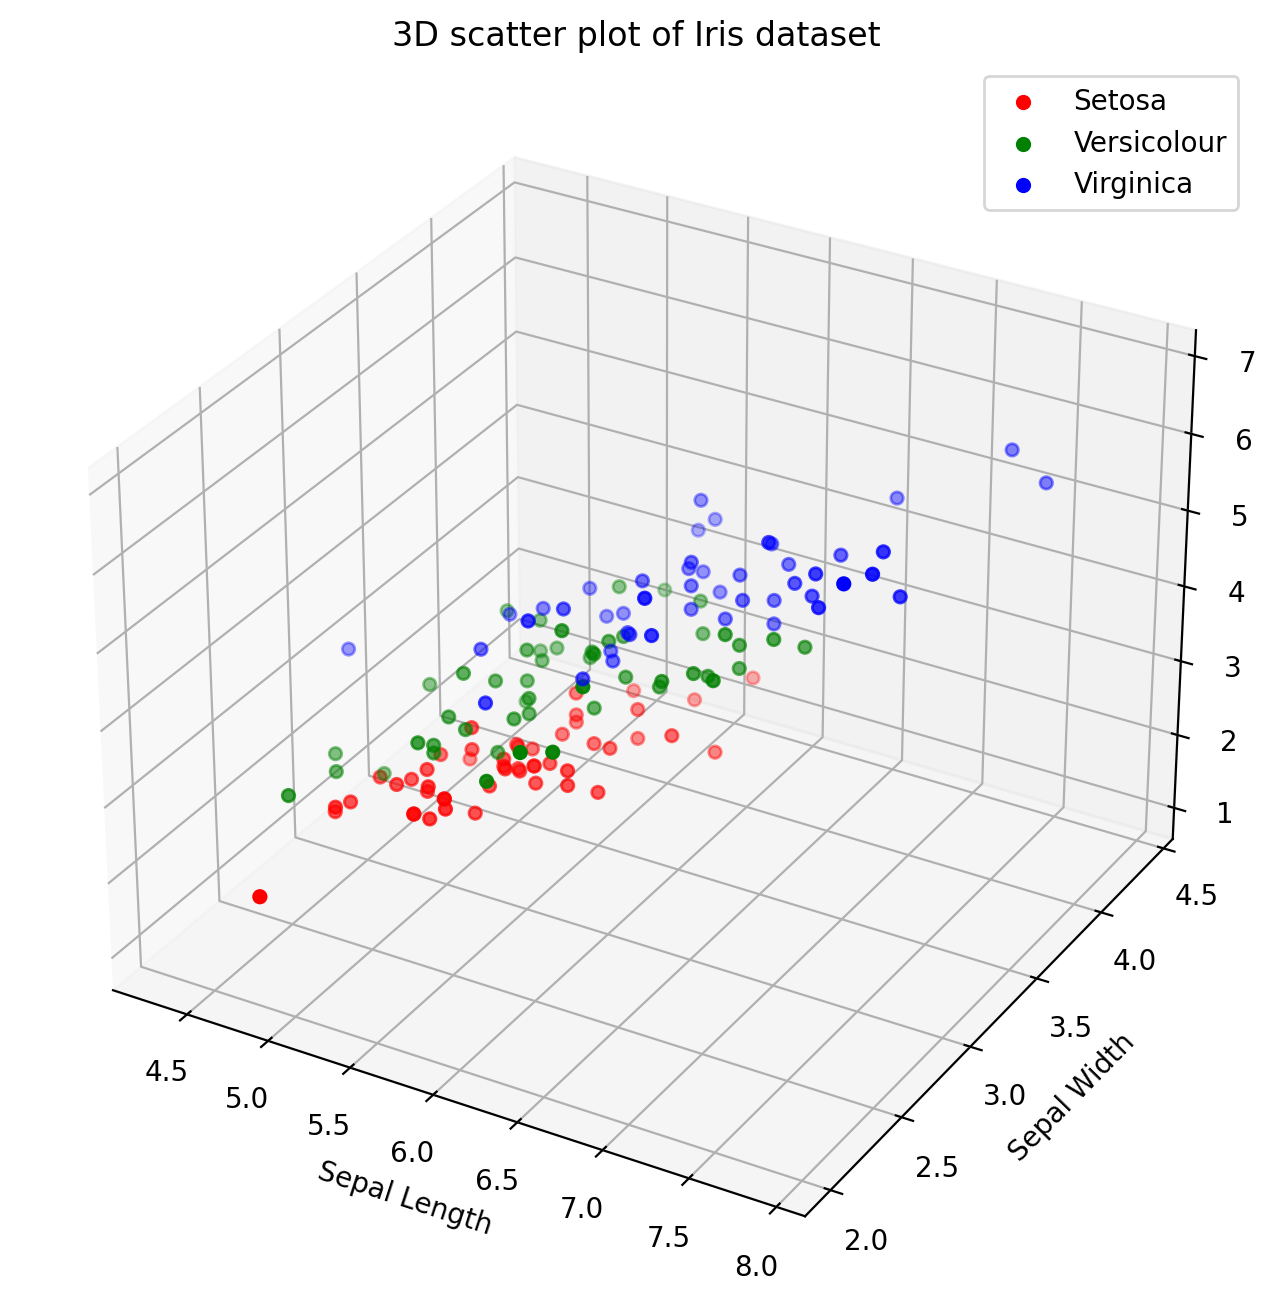

In [64]:
# b
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map for the three species
colors = ['r', 'g', 'b']
species = ['Setosa', 'Versicolour', 'Virginica']

for i in range(3):
    ix = y == i
    ax.scatter(X[ix, 0], X[ix, 1], X[ix, 2], c=colors[i], label=species[i])

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()

plt.title('3D scatter plot of Iris dataset')

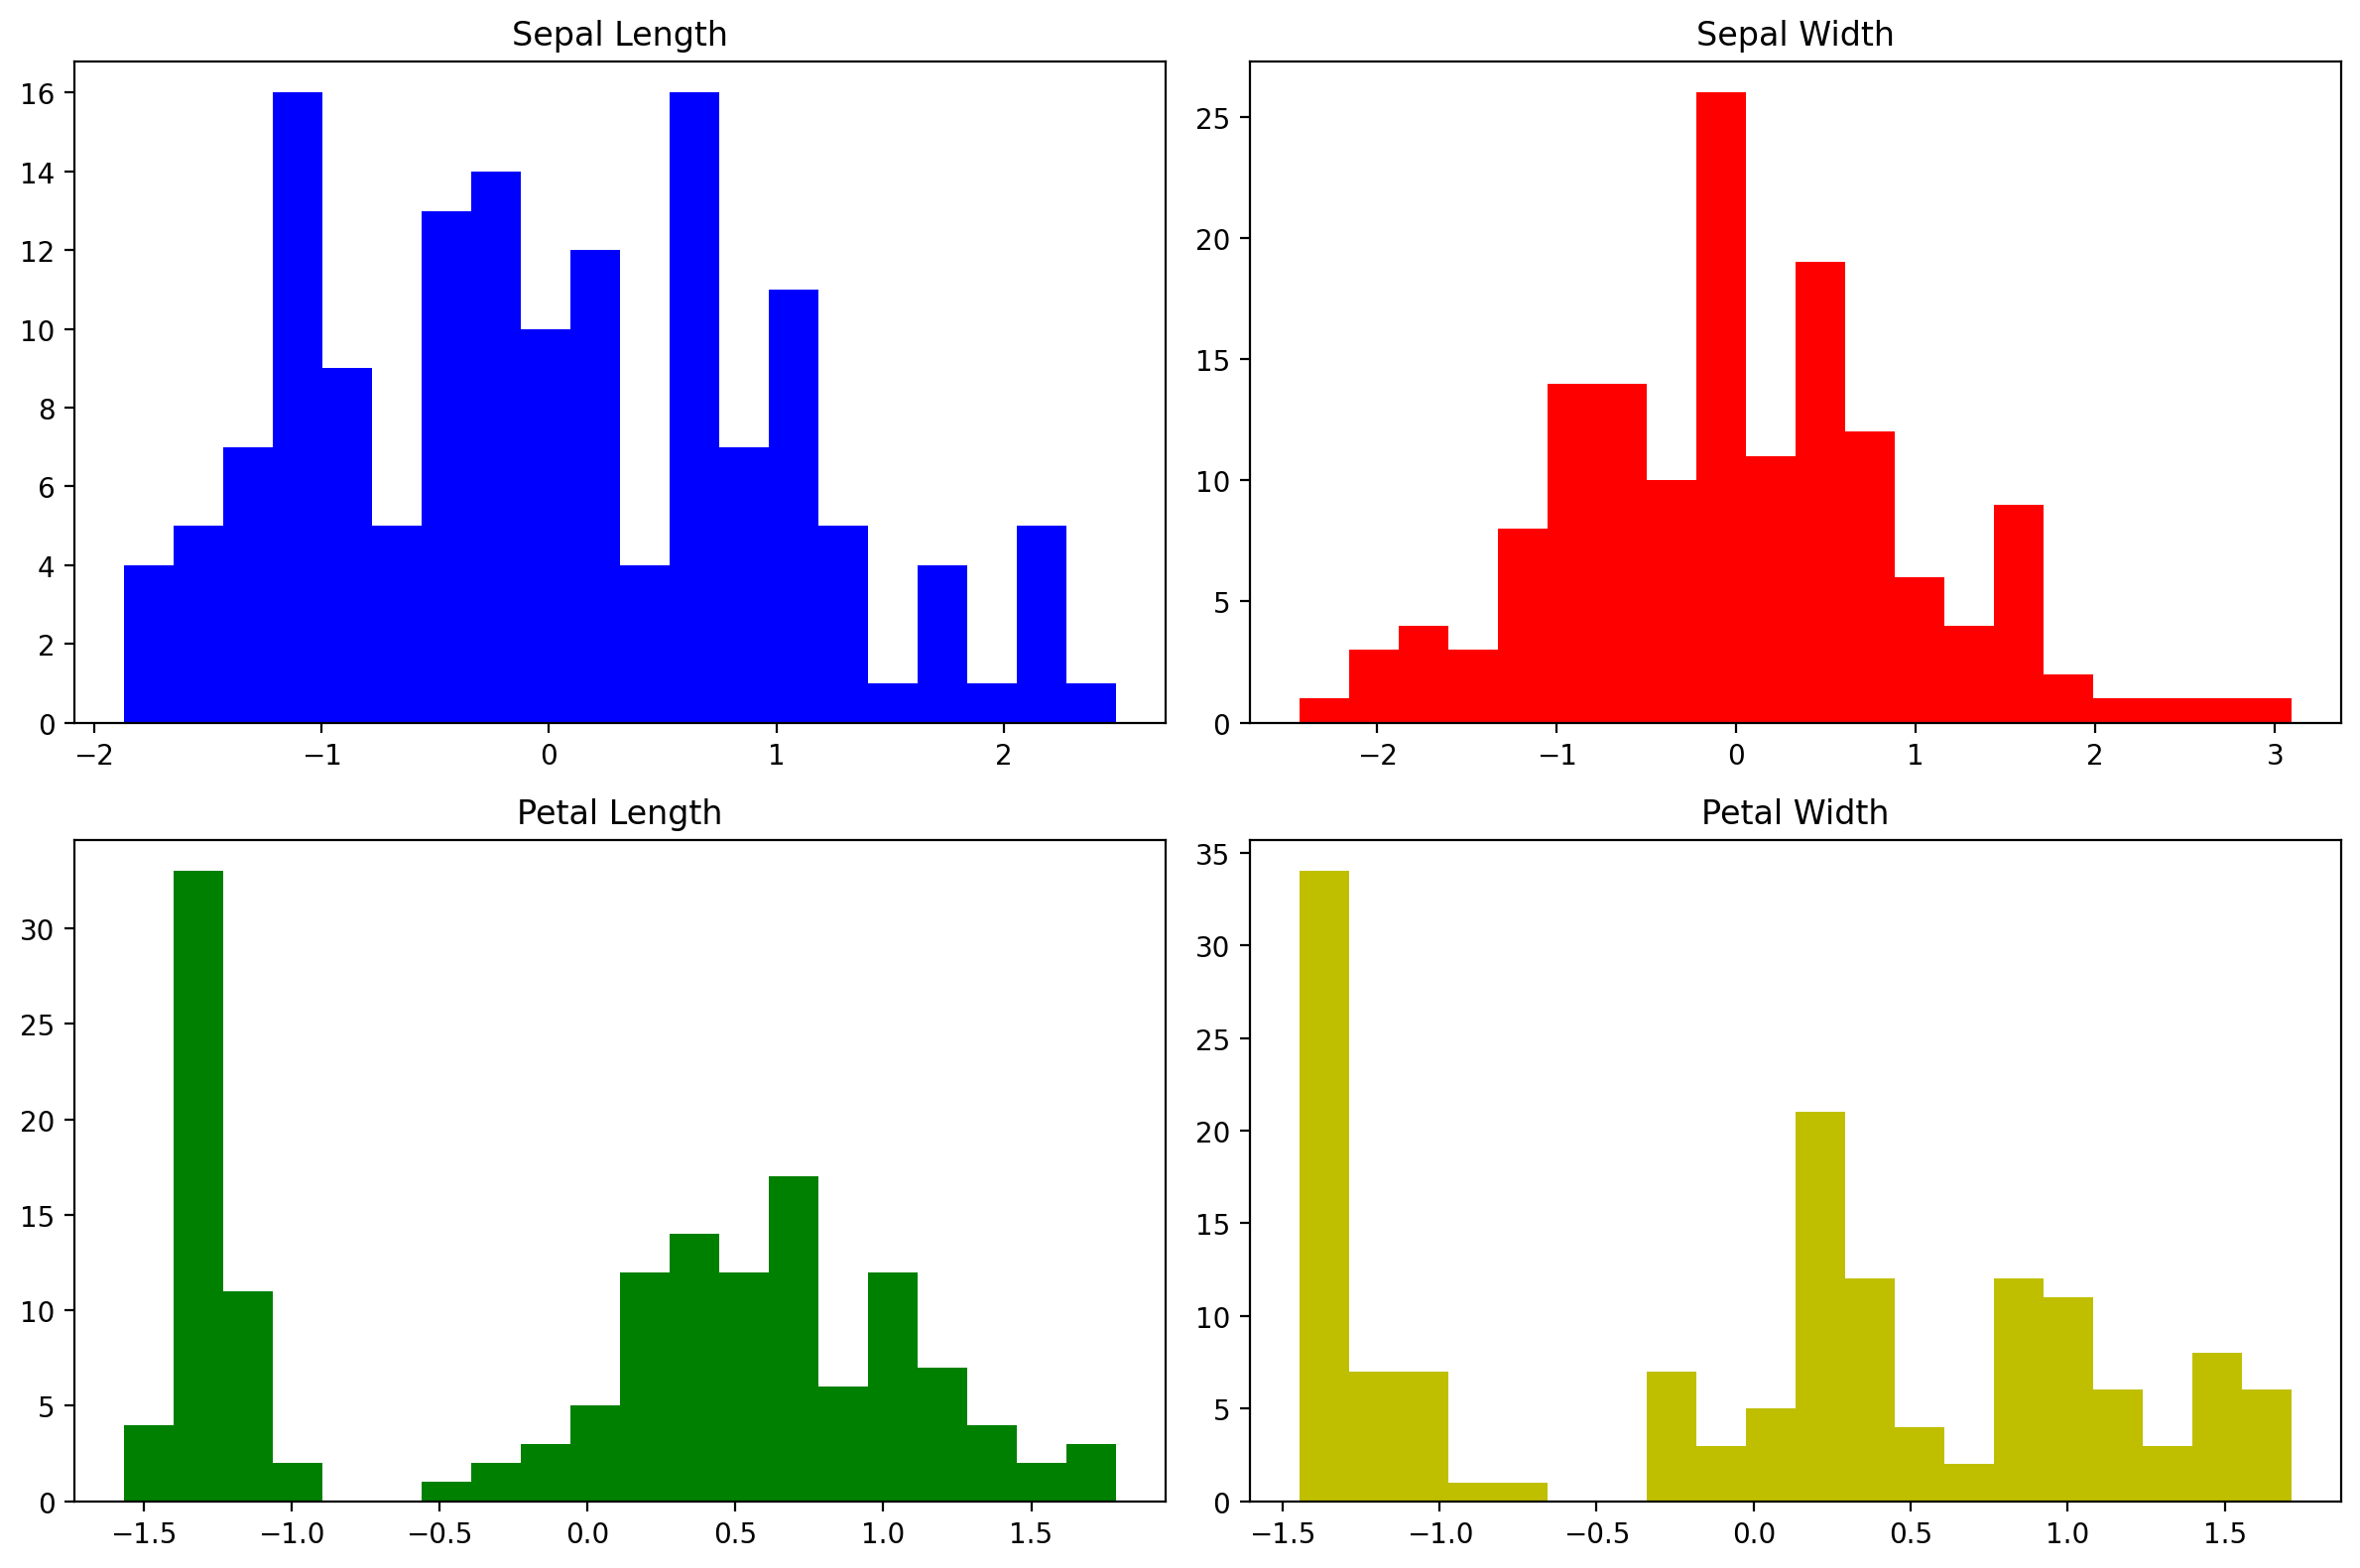

In [19]:
from sklearn.preprocessing import StandardScaler

#Decided to use standard scaling since the Iris data follows a Gaussian Distribution
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(X_scaled[:,0], bins=20, color='b')
axs[0, 0].set_title('Sepal Length')

axs[0, 1].hist(X_scaled[:, 1], bins=20, color='r')
axs[0, 1].set_title('Sepal Width')

axs[1, 0].hist(X_scaled[:, 2], bins=20, color='g')
axs[1, 0].set_title('Petal Length')

axs[1, 1].hist(X_scaled[:, 3], bins=20, color='y')
axs[1, 1].set_title('Petal Width')

plt.tight_layout()
plt.show()

### Problem 3: Unsupervised Learning - Clustering (15 points)
Conduct clustering experiments with one of algorithms discussed in class (e.g., k-means) for number of clusters k = 2-10. Create another 2D or 3D scatter plot utilizing the <b>cluster assignments</b> for color coding (this output can be a plot for each of the values of k or just one final plot using the value of k from your best Silhouette result obtained in Problem 4 below).  

#### Steps:
Repeat for each value of k (maybe a loop here would be appropriate):
1. Create model object
2. Train or fit the model
3. Predict cluster assignments
4. Calculate Silhouette width (see Problem 4)
4. Plot points color coded by class labels predicted by the model.

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print(X_scaled.shape)
data = iris.data

print(data)

models = []
sil_scores = []

for k in range(2,11):
    
    km = KMeans(n_clusters=k)

    km.fit(X_scaled)
    clusters = km.predict(X_scaled)

    score = silhouette_score(X_scaled, clusters)
    sil_scores.append(score)

    models.append(km)

    


(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

KMeans(n_clusters=2) 0.5859517912768418


/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


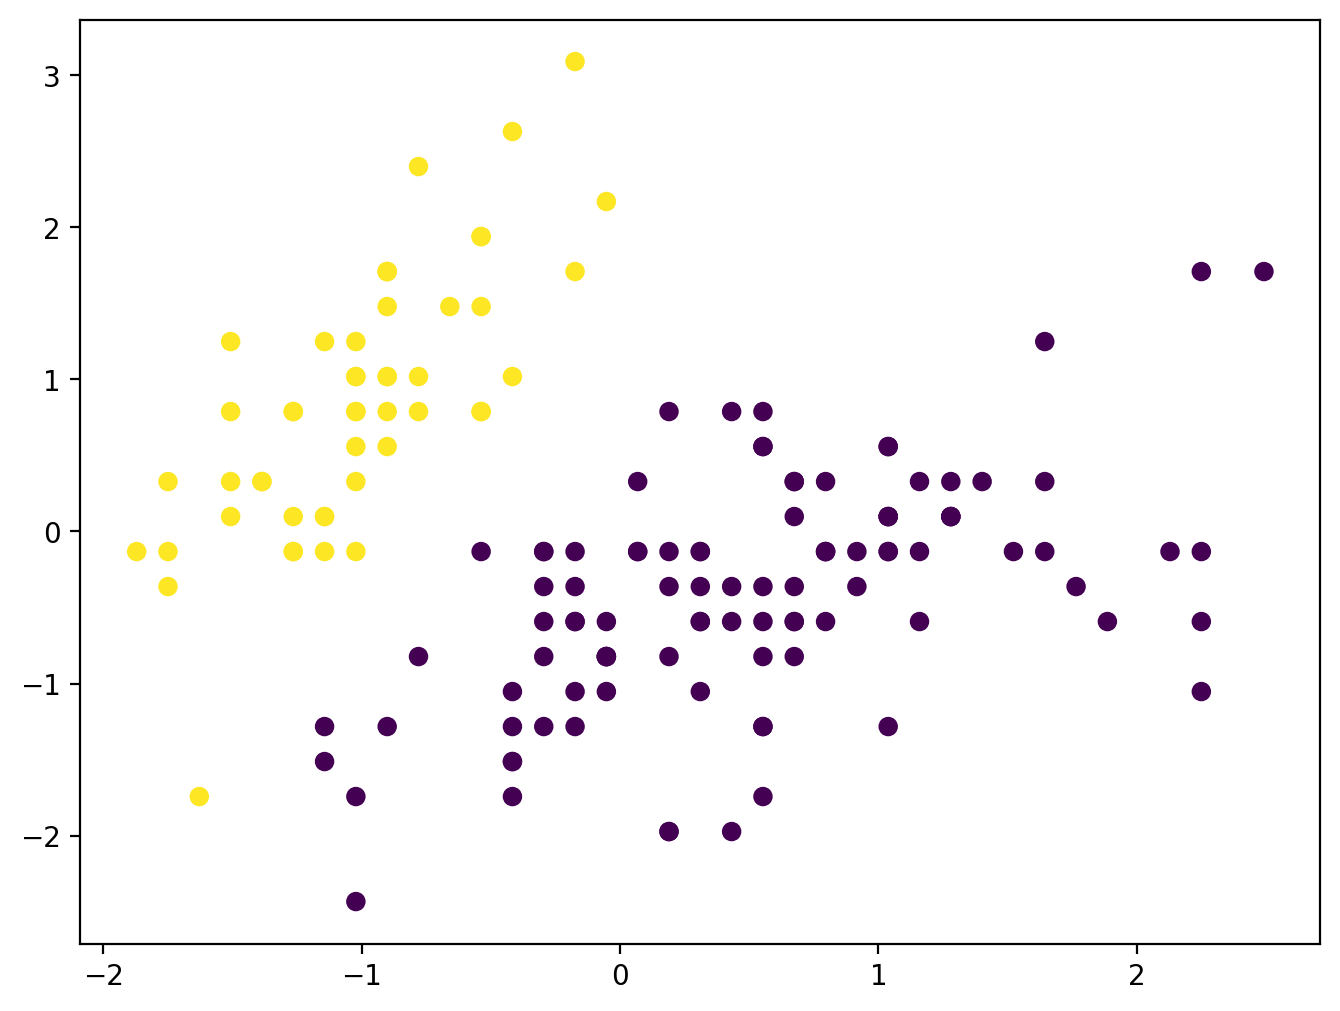

In [80]:
best_sil_score = sil_scores.index(max(sil_scores))

print(models[best_sil_score], sil_scores[best_sil_score])

k2 = KMeans(n_clusters=2)
k2.fit(X_scaled)
k2_predict = k2.predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=k2_predict)
plt.show()

### Problem 4: Evaluate results (20 points)

As we have discussed, validating an usupervised problem is difficult. There is a metric that can be used to determine the density or separation of cluster assignments, called Silhouette width. In this step, perform analysis of results using the above `k = 2-10` and compute the Silhouette width (Hint: possibly you can just add code to your loop in problem 3 and store the results in a list of values). 

Scikit Learn has a great example for Silhouette analysis [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

1. For each k (k = 2-10), what are the Silhouette width values?
 

2. Discuss if your best number of clusters (highest Silhouette width value) matches your hypothesis from Problem 1.

In [63]:
#1
print(sil_scores)

[0.5817500491982808, 0.45994823920518635, 0.38694104154427816, 0.3455109959980946, 0.34532360613243734, 0.34286029821125646, 0.34246507653198094, 0.3460773417568165, 0.3449883503639177]


In [ ]:
#2: This does not match my hypothesis from problem 1, as I initially predicted 3 clusters of data.

### Problem 5 (15 points): Principal Component Analysis (PCA)
PCA is the most popular form of dimensionality reduction, which basically, rotates and transforms the data into a new subspace, such that the resultant matrix has:
- Most relevance (variation) now associated with first feature
- Second feature gets the next most, etc.
#### Steps:
1. Reduce the feature data (X) using PCA
2. Repeat the same experiment from problem 3 above (remember your plots are now the 1st, 2nd, and possibly 3rd principal component vs. the raw feature data like before).
3. Compare and contrast results to those from previous/non-PCA problems; does it perform better/worse/same? Provide discussion below (this could vary, depending on setup).

In [79]:
# Clustering with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Check the shape of the transformed data
X_pca.shape
    

(150, 3)

In [84]:
print(X_pca.shape)
data = iris.data

print(data)

models2 = []
sil_scores2 = []

for k in range(2,11):
    
    km = KMeans(n_clusters=k)

    km.fit(X_pca)
    clusters = km.predict(X_pca)

    score = silhouette_score(X_pca, clusters)
    sil_scores2.append(score)

    models2.append(km)

print(models2, sil_scores2)

(150, 3)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

[KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10)] [0.5859517912768418, 0.46613062910381436, 0.39555984332211214, 0.3534956349655259, 0.30019116015870295, 0.35045863534921956, 0.3543890073859782, 0.35080312849203615, 0.35772188488539786]


KMeans(n_clusters=2) 0.5859517912768418


/Users/jayco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


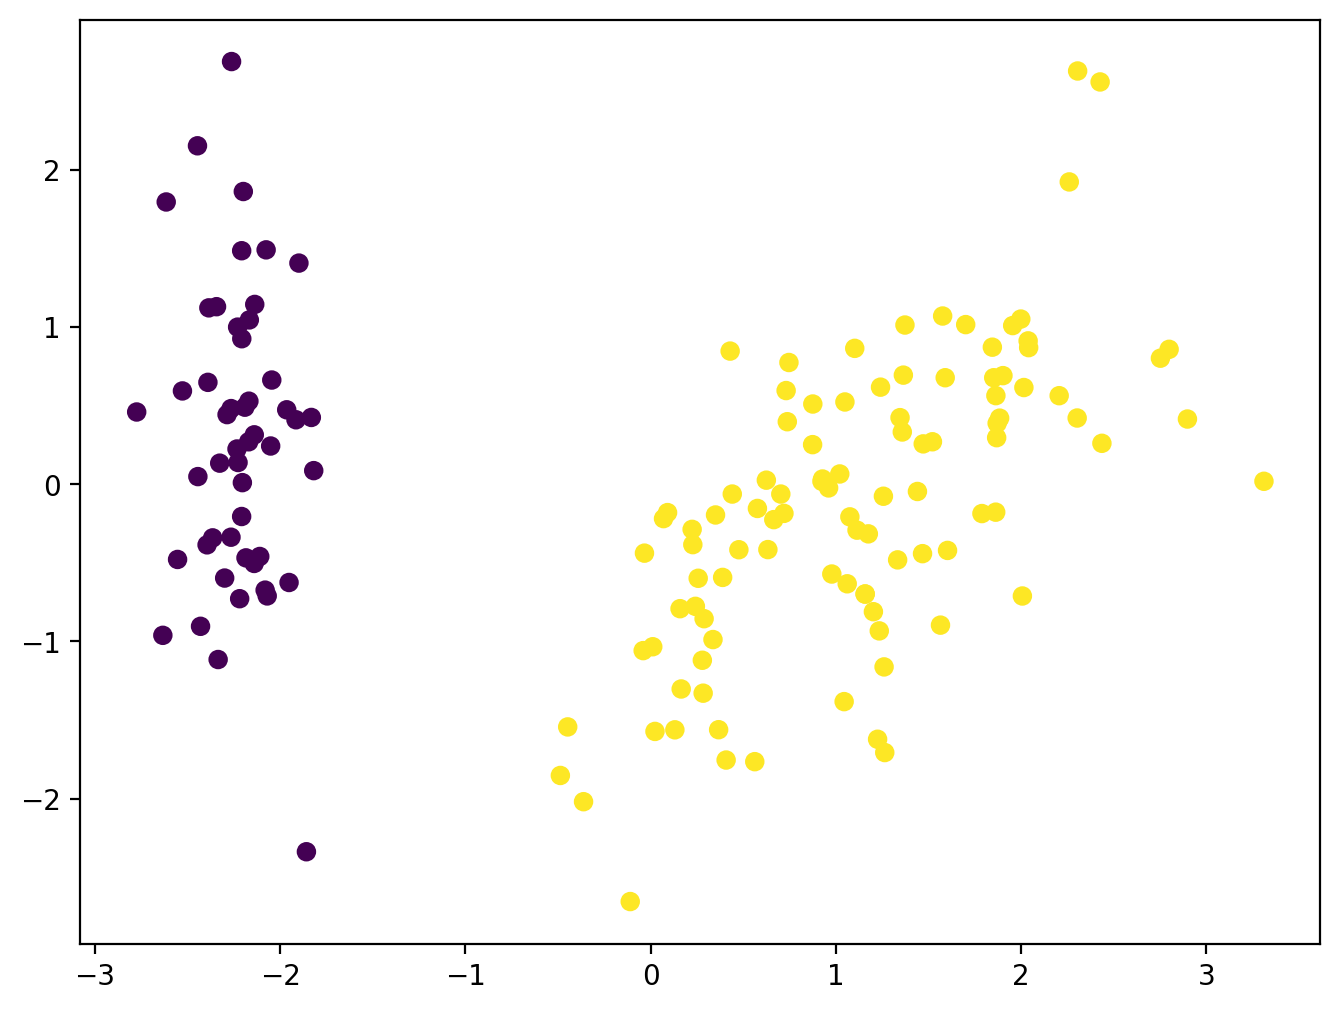

In [85]:
best_sil_score2 = sil_scores2.index(max(sil_scores2))

print(models2[best_sil_score2], sil_scores2[best_sil_score2])

k_p = KMeans(n_clusters=2)
k_p.fit(X_pca)
k_p_predict = k_p.predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k_p_predict)
plt.show()

**Discuss new results**(Edit this cell)
>I got the same result as I did fro the previous non_PCA analysis. I am confident this is wrong. I am not really sure what to do for this assignment.
>

## You Finished! Treat yourself by taking this questionnaire
### Questionnaire
1) How long did you spend on this assignment?
<br>Around 3 hours<br>
2) What did you like about it? What did you not like about it?
<br>It was difficult to me. I've been able to complete all the projects thus far, but I was a bit lost on this one.<br>
3) Did you find any errors or is there anything you would like changed?
<br>None that I can think of.<br>